In [1]:
install.packages("sqldf")
library(sqldf)
library(tidyverse)

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()  masks stats::filter()
x purrr::flatten() masks jsonlite::flatten()
x dplyr::lag()     masks stats::lag()


# What is SQL



- Stands for Structured Query Language
- Used on relational databases
- Used to perform tasks such as update data on a database, or retrieve data from a database
- Has several standard commands such as "Select", "Insert", "Update", "Delete", "Create", and "Drop"

<br><br><br>

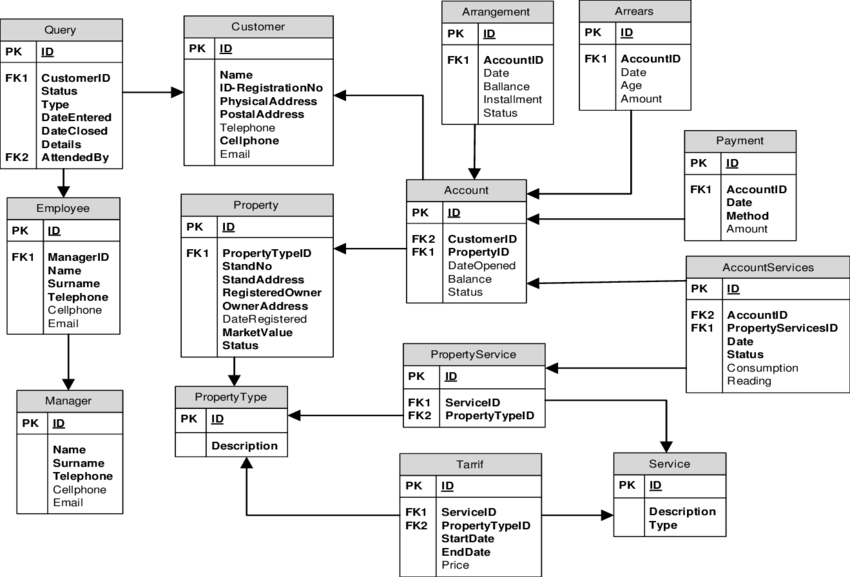



# Examples

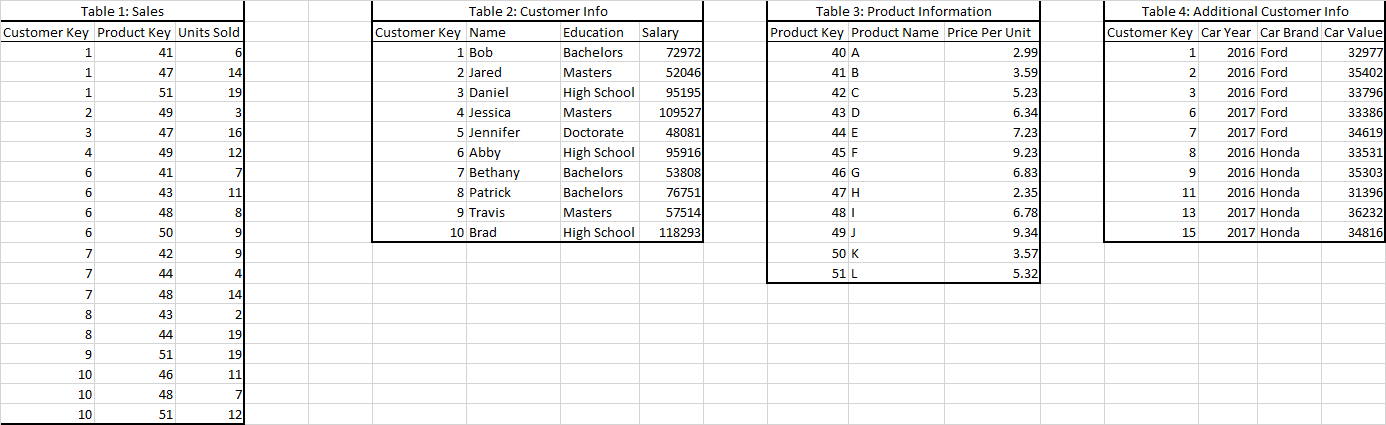


In [2]:
Table_1 <- data.frame("Customer_Key" = c(1,1,1,2,3,4,6,6,6,6,7,7,7,8,8,9,10,10,10),
                      "Product_Key" = c(41,47,51,49,47,49,41,43,48,50,42,44,48,43,44,51,46,48,51),
                      "Units_Bought" = c(6,14,19,3,16,12,7,11,8,9,9,4,14,2,19,19,11,7,12))

Table_2 <- data.frame("Customer_Key" = c(1,2,3,4,5,6,7,8,9,10),
                      "Name" = c("Bob","Jared","Daniel","Jessica","Jennifer","Abby","Bethany","Patrick","Travis","Brad"),
                      "Education" = c("Bachelors","Masters","High School","Masters","Doctorate","High School",
                                     "Bachelors","Bachelors","Masters","High School"),
                      "Salary" = c(72972,52046,95195,109527,48081,95916,53808,76751,57514,118293))

Table_3 <- data.frame("Product_Info" = c(40,41,42,43,44,45,46,47,48,49,50,51),
                      "Product_Name" = c("A","B","C","D","E","F","G","H","I","J","K","L"),
                      "Unit_Price" = c(2.99,3.59,5.23,6.34,7.23,9.23,6.83,2.35,6.78,9.34,3.57,5.32))
Table_4 <- data.frame("Customer_Key" = c(1,2,3,6,7,8,9,11,13,15),
                      "Car_Year" = c(2016,2016,2016,2017,2017,2016,2016,2016,2017,2017),
                      "Car_Brand" = c("Ford","Ford","Ford","Ford","Ford","Honda",
                                      "Honda","Honda","Honda","Honda"),
                      "Car_Value" = c(32977,35402,33796,33386,34619,33531,35303,31396,36232,34816))

# Querying 

## Simple Selects
```r
df <- sqldf('select * from Table_2')
df
```

<img src="snip 1.png">


```r
df <- sqldf('select Customer_key,Salary  from Table_2')
df
```
<img src="snip 2.png">

<br><br><br>

## Where Statement

```r
df <- sqldf('select * from Table_2 where education != "High School"')
df
```
<img src="snip 20.png">

```r
df <- sqldf('select * from Table_2 where education != "High School" or salary > 80000')
df
```
<img src="Or.png">

```r
df <- sqldf('select * from Table_2 where education != "High School" and salary > 80000')
df
```
<img src="snip 5.png">

## Group By, Aggregations, and Ordering

```r
df <- sqldf('select Car_Year,Car_Brand, sum(Car_Value) as Total_Car_Value, 
    avg(Car_Value) as Avg_Car_Value from Table_4 group by Car_Year,Car_Brand order by Car_Brand, Total_Car_Value')
df
```
<img src="snip 9.png">

## Joins
<img src="sql_joins.jpg">
<br><br><br><br><br>





```r
df <- sqldf('Select A.*,B.Car_Year,B.Car_Brand,B.Car_Value from Table_1 A 
    left join Table_4 B on A.Customer_key = B.Customer_key')
df
```
<img src="snip 10.png">


```r
df <- sqldf('Select A.*,B.* From Table_1 A inner join Table_4 B on A.customer_key = B.customer_key')
df
```
<img src="snip 11.png">

```r
df <- sqldf('Select A.*,B.Name,B.Education,B.Salary,C.Product_Name,C.Unit_Price From Table_1 A 
    left join Table_2 B on A.customer_key = B.customer_key
    left join Table_3 C on A.product_key = C.Product_Info')
df
```
<img src="snip 12.png">

## Creating new variables
```r
df <- sqldf("SELECT *, 201808 as MYR, 
    case when Education != 'High School' then 1 else 0 end as Some_College,
    case when Education like '%Mast%' or Education like '%Doc%' then 1 else 0 end as Post_Grad from Table_2")
df
```


<img src="snip 15.png">



## A little bit of everything

```r
df <- sqldf('SELECT distinct A.Education,sum(A.Salary) as Total_Salary,avg(B.Units_Bought) as Avg_Units_Bought, Count(A.Education) as Total_Persons from Table_2 A 
            Left join Table_1 B on A.customer_key = B.customer_key 
            Where A.Salary < 100000
            Group by A.Education
            Order by sum(A.Salary)')
df
```
<img src="snip 14.png">

# More Advanced SQL

## Subqueries
```r
df <- sqldf("With table1 as(Select A.*,B.Product_Name,B.Unit_Price, 
    A.units_bought * B.Unit_Price as Revenue from Table_1 A left join Table_3 B on 
    A.Product_Key = B.Product_Info) Select * from table1")
df
```

<img src="snip 16.png">


```r
df <- sqldf("With table1 as
    (Select A.*,B.Product_Name,B.Unit_Price, 
    A.units_bought * B.Unit_Price as Revenue 
    from Table_1 A 
    left join Table_3 B on 
    A.Product_Key = B.Product_Info) 
    Select A.Education
    ,sum(B.Revenue) as Total_Revenue,sum(B.Units_Bought) as total_units_bought,
    avg(B.Revenue) as average_revenue, avg(B.units_Bought) as average_units_bought
    from Table_2 A 
    left join table1 B on A.Customer_Key = B.Customer_Key
    group by A.Education")
df
```

<img src="snip 17.png">

## Using R Variables in SQL Query

```r
MaxSalary <- 75000
Edu <- "Doc"


df <- fn$sqldf("select * from Table_2 where Salary < $MaxSalary
    and Education not like '%$Edu%'")
df
```

<img src="snip 18.png">
